In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import lane_detection
import lane_following

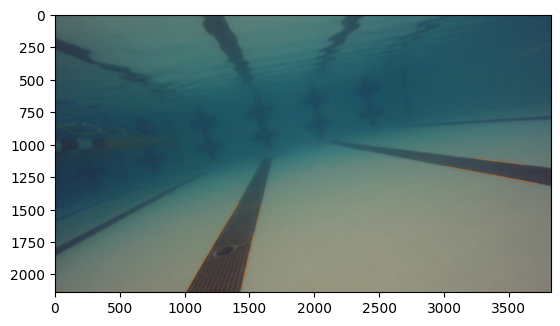

In [2]:
img = cv2.imread("lanes.png")
lines = lane_detection.detect_lines(img, 30, 40, 3, 150, 20)
lanes = lane_detection.detect_lanes(lines)
drawing = lane_detection.draw_lines(img, lines)
plt.imshow(cv2.cvtColor(drawing, cv2.COLOR_BGR2RGB))

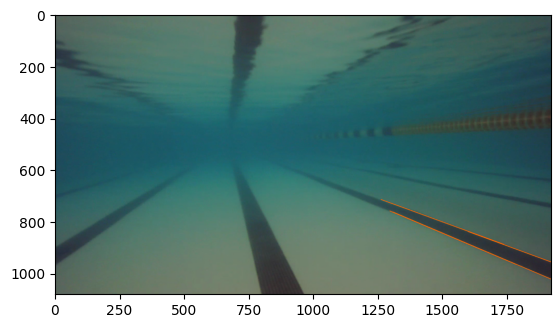

forward


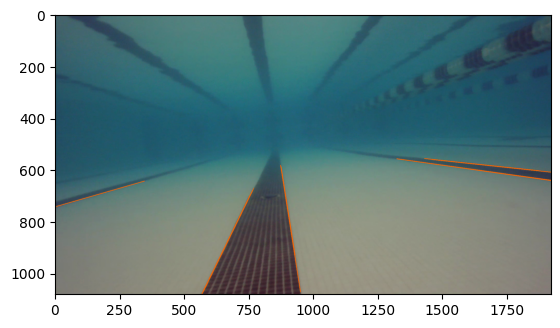

left


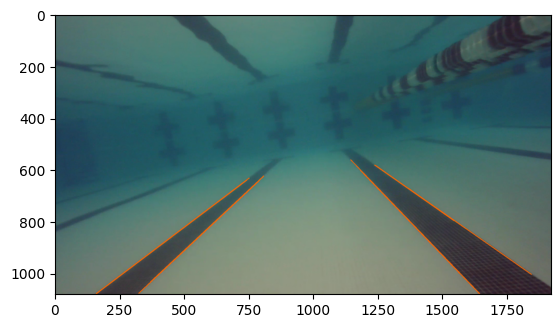

left


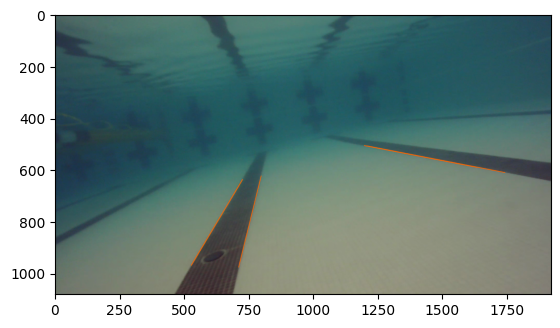

forward


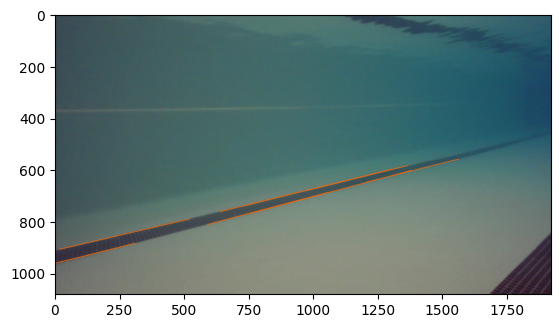

right


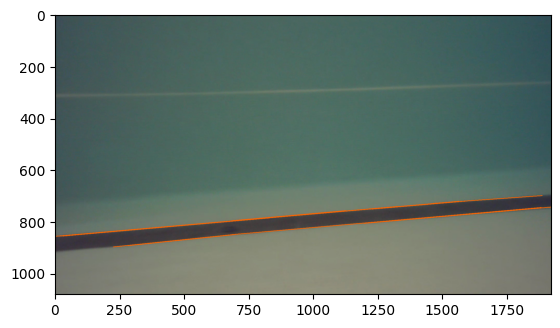

right


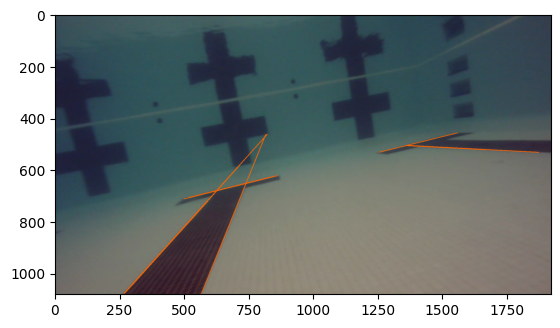

right


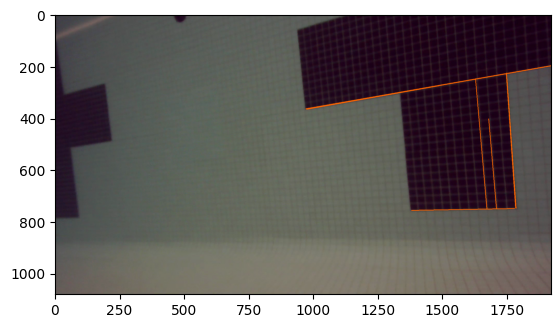

left


In [3]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

freq = 300
i = 0

while True:
    ret, img = vcap.read()

    if not ret:
        break

    if i % freq == 0:
        c = img.shape[0]/2
        lines = lane_detection.detect_lines(img, 30, 40, 3, 300, 200)
        lanes = lane_detection.detect_lanes(lines)
        img = lane_detection.draw_lanes(img, lanes)
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.show()
        
        center_lane = lane_following.get_lane_center(lanes)

        color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(color_img)
        plt.show()
        mid = lane_following.get_lane_center(lanes)

        direction = lane_following.recommend_direction(mid[0], mid[1], c)
        print (direction)

    i += 1

